In [1]:
#linear regression 
# dataset read create 
# plotting 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sklearn

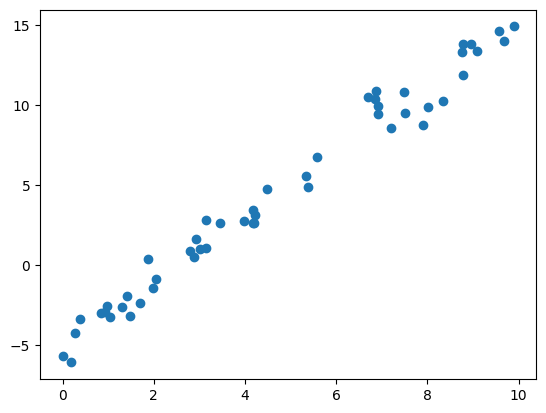

In [6]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2*x -5 + rng.randn(50)
plt.scatter(x,y)

In [8]:
x.shape

(50,)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:,np.newaxis] , y)

LinearRegression()

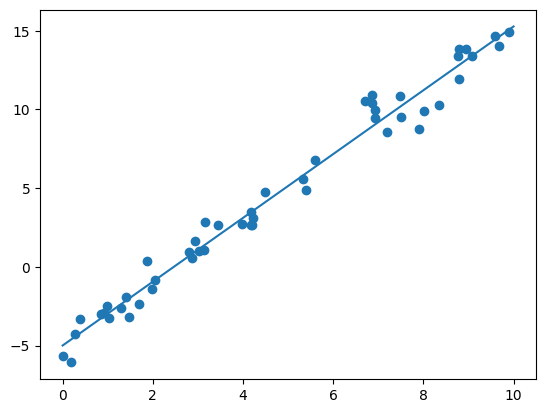

In [10]:
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [12]:
model.coef_ # slop 

array([2.02720881])

In [13]:
model.intercept_

-4.998577085553202

In [14]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mean_squared_error(y ,model.predict(x[:,np.newaxis] ))

0.818338857026618

In [15]:
mean_absolute_error(y ,model.predict(x[:,np.newaxis] ))

0.7200436983357034

In [16]:
r2_score(y ,model.predict(x[:,np.newaxis] ))

0.9790800609430612

### Polynomial Regression

In [20]:
# x , y
# x , y ====> nonlinear
# x ====> regression ======> y
# x , X^2 , X^3 , 
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2,3,4])
poly = PolynomialFeatures(3,include_bias = True)
x_poly_features = poly.fit_transform(x[: , None])

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [21]:
x = 10 * np.linspace(0,10,50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly = PolynomialFeatures(3,include_bias = False)
x_poly_features = poly.fit_transform(x[: , None])

In [22]:
model = LinearRegression(fit_intercept = True)
model.fit(x_poly_features , y)

LinearRegression()

In [23]:
mean_absolute_error(y ,model.predict(x_poly_features ))

0.6234397063288942

In [26]:
#pipline
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(3,include_bias = False),
                           LinearRegression(fit_intercept = True) )
poly_model.fit(x[:,None] , y)


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [27]:
preds = poly_model.predict(x[:,None] )
mean_absolute_error(y ,preds)

0.6234397063288942

In [29]:
data = pd.read_csv("data.txt")
data

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity            178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color                 178 non-null    float64
 11  hue                   178 non-null    float64
 12  od                    178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [31]:
data.describe(include = "all")

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
data["class"].nunique()

3

In [34]:
data = data[data["class"] <= 2]

In [35]:
data["class"].nunique()

2

In [36]:
x = data[["alcohol" , "ash" ]]

In [37]:
data["class"]

0      1
1      1
2      1
3      1
4      1
      ..
125    2
126    2
127    2
128    2
129    2
Name: class, Length: 130, dtype: int64

In [38]:
from sklearn.preprocessing import label_binarize

In [40]:
y = label_binarize(data["class"].values , classes = [1,2])[:,0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
x

,alcohol,ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
...,...,...
125,12.07,2.17
126,12.43,2.29
127,11.79,2.78
128,12.37,2.30


In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [43]:
x_train.shape , y_train.shape

((104, 2), (104,))

In [44]:
x_test.shape , y_test.shape

((26, 2), (26,))

In [50]:
y_train

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [58]:
x_train = x_train.values

In [59]:
x_train

array([[13.88,  2.59],
       [12.85,  2.52],
       [11.65,  2.62],
       [13.24,  2.29],
       [13.39,  2.62],
       [12.08,  2.3 ],
       [11.03,  2.2 ],
       [12.6 ,  1.9 ],
       [11.84,  2.23],
       [13.56,  2.31],
       [11.45,  2.42],
       [13.3 ,  2.14],
       [13.03,  1.71],
       [13.63,  2.7 ],
       [12.42,  2.73],
       [13.05,  2.55],
       [12.52,  2.17],
       [12.16,  2.31],
       [13.34,  2.36],
       [11.56,  3.23],
       [13.83,  2.6 ],
       [11.64,  2.46],
       [12.37,  2.56],
       [11.81,  2.74],
       [12.42,  2.19],
       [13.58,  2.36],
       [14.1 ,  2.4 ],
       [13.86,  2.27],
       [11.82,  1.88],
       [13.11,  1.7 ],
       [12.51,  1.98],
       [12.08,  1.7 ],
       [14.1 ,  2.3 ],
       [12.67,  2.24],
       [14.3 ,  2.72],
       [12.25,  2.12],
       [13.73,  2.7 ],
       [14.83,  2.17],
       [11.76,  2.92],
       [12.42,  2.27],
       [12.21,  1.75],
       [14.12,  2.32],
       [13.2 ,  2.14],
       [13.

In [60]:
x_test = x_test.values

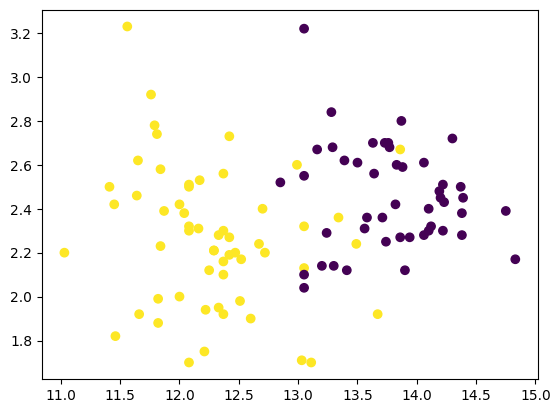

In [61]:
plt.scatter(x_train[: , 0] , x_train[:, 1], c = y_train[:])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
log_model = LogisticRegression()
log_model.fit(x_train , y_train)

LogisticRegression()

In [63]:
pred = log_model.predict(x_test)

In [64]:
accuracy = accuracy_score(y_test , pred)
accuracy

0.9230769230769231

In [66]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.88      1.00      0.93        14

    accuracy                           0.92        26
   macro avg       0.94      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26



### Features Selection

In [68]:
titanic_data = pd.read_csv("train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# filter , embedded wraper methods

### Filter Method

In [70]:
# numerical  ====> Correlation 
# categorical ====> chi2 coefficient
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
numerical_features = titanic_data.select_dtypes(include=['float64' , 'int64']).columns
categorical_features = titanic_data.select_dtypes(include=['object']).columns
numerical_features , categorical_features

(Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))

In [72]:
import seaborn as sns

Text(0.5, 1.0, 'correlation_mat')

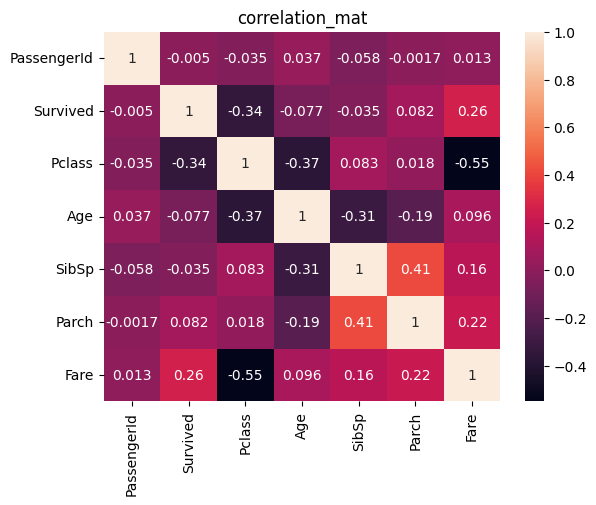

In [74]:
correlation_mat = titanic_data[numerical_features].corr()
sns.heatmap(correlation_mat , annot = True)
plt.title("correlation_mat")

In [75]:
correlation_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [76]:
correlation_threshold =  0.05
corr_with_survived = correlation_mat['Survived'].abs()
corr_with_survived

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Age            0.077221
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [79]:
highly_correlated_features = corr_with_survived[corr_with_survived>correlation_threshold].index.to_list()
highly_correlated_features

['Survived', 'Pclass', 'Age', 'Parch', 'Fare']

In [80]:
new_data = titanic_data[highly_correlated_features]
new_data

,Survived,Pclass,Age,Parch,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
886,0,2,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,0,3,NaN,2,23.4500
889,1,1,26.0,0,30.0000


Missing value

In [82]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
missing_value_threshold = 0.4 
missing_values_ratios = titanic_data.isnull().mean()
missing_values_ratios

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [84]:
columns_to_drop = missing_values_ratios[missing_values_ratios>missing_value_threshold].index.tolist()
columns_to_drop

['Cabin']

In [87]:
x = new_data.drop(columns='Survived')
x

,Pclass,Age,Parch,Fare
0,3,22.0,0,7.2500
1,1,38.0,0,71.2833
2,3,26.0,0,7.9250
3,1,35.0,0,53.1000
4,3,35.0,0,8.0500
...,...,...,...,...
886,2,27.0,0,13.0000
887,1,19.0,0,30.0000
888,3,NaN,2,23.4500
889,1,26.0,0,30.0000


In [88]:
y = new_data["Survived"]

In [89]:
x = x.fillna(x.mean())

In [90]:
x_train , x_test , y_train , y_test = train_test_split(x.values , y.values  , test_size = 0.2)

In [91]:
from sklearn.feature_selection import RFE

In [92]:
model = LogisticRegression()
rfe = RFE(model , n_features_to_select=2)

In [93]:
x_train_rfe = rfe.fit_transform(x_train, y_train)
x_train_rfe

array([[3., 0.],
       [3., 0.],
       [1., 2.],
       ...,
       [3., 3.],
       [3., 0.],
       [3., 0.]])

In [102]:
x.columns[rfe.support_]

Index(['Pclass', 'Parch'], dtype='object')

### Embedded Method

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

In [105]:
lasso_model = Lasso(alpha= 0.01 , random_state=42)
lasso_model.fit(x_train ,y_train)

Lasso(alpha=0.01, random_state=42)

In [106]:
lasso_model.coef_

array([-0.16621166, -0.00721647,  0.00388976,  0.00113022])

In [110]:
lasso_selected_features = x.columns[abs(lasso_model.coef_)>0.005]
lasso_selected_features

Index(['Pclass', 'Age'], dtype='object')

In [111]:
x_train , x_test , y_train , y_test = train_test_split(x , y  , test_size = 0.2)
x_train_lasso = x_train[lasso_selected_features]

In [112]:
x_train_lasso

,Pclass,Age
759,1,33.000000
169,3,28.000000
565,3,24.000000
503,3,37.000000
505,1,18.000000
...,...,...
385,2,18.000000
320,3,22.000000
579,3,32.000000
26,3,29.699118


In [113]:
pred = lasso_model.predict(x_train)

c:\Users\Khalid\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [116]:
pred

array([ 0.61953658,  0.28928413,  0.28159199,  0.171319  ,  0.75310065,
        0.26429955,  0.46180493,  0.61605561,  0.50629384,  0.22136369,
        0.32257746,  0.23136618,  0.22173539,  0.44584703,  0.5025876 ,
        0.23136618,  0.22713875,  0.21256928,  0.41667863,  0.44241811,
        0.61254664,  0.2714833 ,  0.29037941,  0.22226787,  0.37136789,
        0.22970832,  0.40690088,  0.78949687,  0.29925642,  0.5769236 ,
        0.22226787,  0.53552144,  0.18579996,  0.57635066,  0.22102462,
        0.36254957,  0.2770225 ,  0.81189299,  0.41575711,  0.22955782,
        0.42824516, -0.00566251,  0.24898415,  0.28482348,  0.26339537,
        0.52742328,  0.15815026,  0.24474789,  0.46806561,  0.24882116,
        0.45868526,  0.28459269,  0.43674874,  0.15500706,  0.25759324,
        0.58139774,  0.24877878,  0.1004185 ,  0.2219288 ,  0.22951069,
        0.22209359,  0.47372173,  0.22133543,  0.60914696,  0.20726291,
        0.22950605,  0.54559287,  0.27692413,  0.37305435,  0.16

In [117]:
y_train.values

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [118]:
pred = [pred > 0.5]

In [120]:
pred = pred[0].astype("int")

In [121]:
pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [122]:
accuracy_score(pred , y_train.values)

0.7078651685393258

In [ ]:
#read dataset 
#preprocessing
#   most correlated features and select them
#   handle missing values 
#   handle outliers 
#   Data normalization
#feature selection  wrapper and embedding
#choose ml 
#hyperparameter tuning 

In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [124]:
houses_data = pd.read_csv("house_train.csv")
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
houses_data.shape

(1460, 81)

In [126]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [127]:
houses_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [129]:
isnull_df = pd.DataFrame(houses_data.isna().mean().sort_values(ascending=True), columns = ["null_sum"])
isnull_df

,null_sum
Id,0.000000
TotalBsmtSF,0.000000
Heating,0.000000
SaleCondition,0.000000
CentralAir,0.000000
...,...
MasVnrType,0.597260
Fence,0.807534
Alley,0.937671
MiscFeature,0.963014


In [130]:
drop_columns = isnull_df.index[isnull_df['null_sum'] > 0.3]
drop_columns

Index(['FireplaceQu', 'MasVnrType', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')

In [131]:
houses_data.drop(columns=drop_columns , inplace=True)

In [136]:
houses_data['Id'].unique().shape

(1460,)

In [138]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [139]:
houses_data.drop(columns=["Id"], inplace=True)

In [140]:
numerical_features = houses_data.select_dtypes(include=["float64","int64"]).columns
categorical_features = houses_data.select_dtypes(include=["object"]).columns

In [141]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [142]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: >

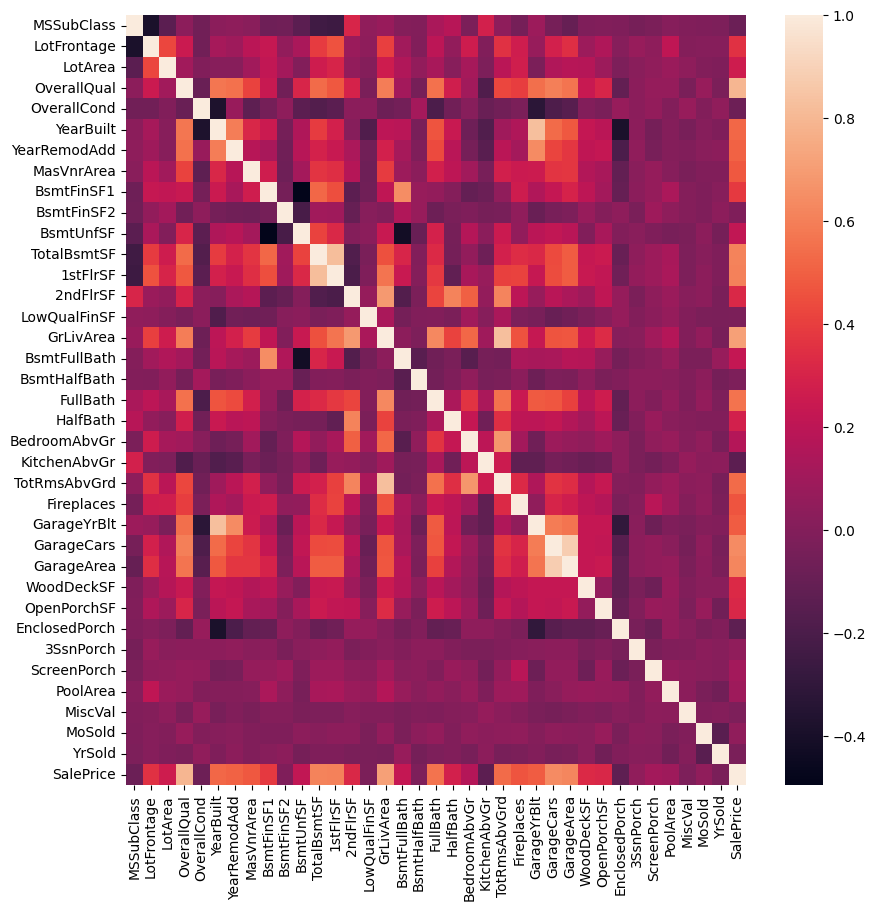

In [146]:
correlation_mat = houses_data[numerical_features].corr()
plt.figure(figsize=(10,10));
sns.heatmap(correlation_mat, annot=False)

In [151]:
numerical_best_features = correlation_mat.nlargest(10 , "SalePrice").index

In [152]:
numerical_best_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

<Axes: >

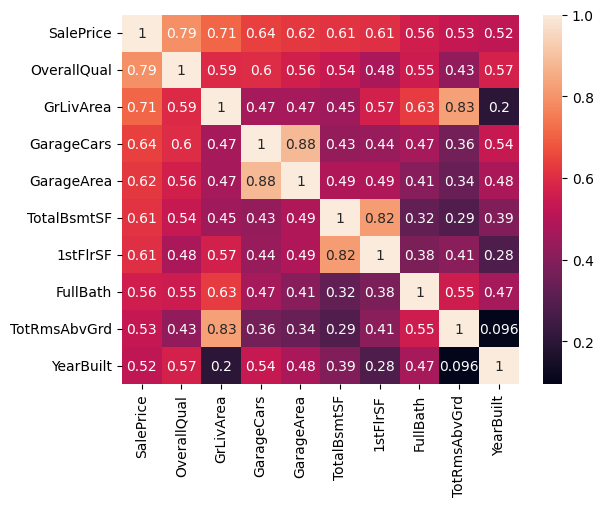

In [153]:
sns.heatmap(houses_data[numerical_best_features].corr(), annot=True)

In [154]:
# label encoder   1 , 2 3 4 
# onehotencoder A ---->  1 0 0
#               B ---->  0 1 0

label_encoder = LabelEncoder()
for feature in categorical_features:
    houses_data[feature] = label_encoder.fit_transform(houses_data[feature])
houses_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [155]:
from sklearn.feature_selection import chi2
chi2_stats , chi2_p_values = chi2(houses_data[categorical_features], houses_data["SalePrice"])
chi2_p_values

array([1.00000000e+000, 1.00000000e+000, 1.32609803e-004, 1.00000000e+000,
       1.00000000e+000, 9.97453183e-001, 6.85967589e-009, 3.24230812e-163,
       1.00000000e+000, 1.00000000e+000, 2.81882006e-127, 5.09679779e-005,
       1.00000000e+000, 1.00000000e+000, 1.74172359e-001, 7.73611767e-005,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 9.99999999e-001, 4.40944951e-006, 1.00000000e+000,
       1.00000000e+000, 7.83157898e-065, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 3.41931766e-040, 9.59197485e-001,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000])

In [157]:
significant_cat_features = [feature for feature, p_value in zip(categorical_features, chi2_p_values) if p_value < 0.05]
significant_cat_features

['LotShape',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'Exterior2nd',
 'BsmtFinType1',
 'HeatingQC',
 'GarageType']

In [158]:
best_features = []
best_features.extend(significant_cat_features)
best_features.extend(numerical_best_features)
best_features

['LotShape',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'Exterior2nd',
 'BsmtFinType1',
 'HeatingQC',
 'GarageType',
 'SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [159]:
new_houses_data = houses_data[best_features]
new_houses_data

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,0,5,0,5,13,2,0,1,208500,7,1710,2,548,856,856,2,8,2003
1,3,0,24,0,2,8,0,0,1,181500,6,1262,2,460,1262,1262,2,6,1976
2,0,0,5,0,5,13,2,0,1,223500,7,1786,2,608,920,920,2,6,2001
3,0,0,6,0,5,15,0,2,5,140000,7,1717,3,642,756,961,1,7,1915
4,0,0,15,0,5,13,2,0,1,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,8,0,5,13,5,0,1,175000,6,1647,2,460,953,953,2,7,1999
1456,3,0,14,0,2,10,0,4,1,210000,6,2073,2,500,1542,2073,2,7,1978
1457,3,0,6,0,5,5,2,0,1,266500,7,2340,1,252,1152,1188,2,9,1941
1458,3,0,12,0,2,8,2,2,1,142125,5,1078,1,240,1078,1078,1,5,1950


In [160]:
new_houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1460 non-null   int32
 1   LandSlope     1460 non-null   int32
 2   Neighborhood  1460 non-null   int32
 3   BldgType      1460 non-null   int32
 4   HouseStyle    1460 non-null   int32
 5   Exterior2nd   1460 non-null   int32
 6   BsmtFinType1  1460 non-null   int32
 7   HeatingQC     1460 non-null   int32
 8   GarageType    1460 non-null   int32
 9   SalePrice     1460 non-null   int64
 10  OverallQual   1460 non-null   int64
 11  GrLivArea     1460 non-null   int64
 12  GarageCars    1460 non-null   int64
 13  GarageArea    1460 non-null   int64
 14  TotalBsmtSF   1460 non-null   int64
 15  1stFlrSF      1460 non-null   int64
 16  FullBath      1460 non-null   int64
 17  TotRmsAbvGrd  1460 non-null   int64
 18  YearBuilt     1460 non-null   int64
dtypes: int32(9), int64(10)
memo

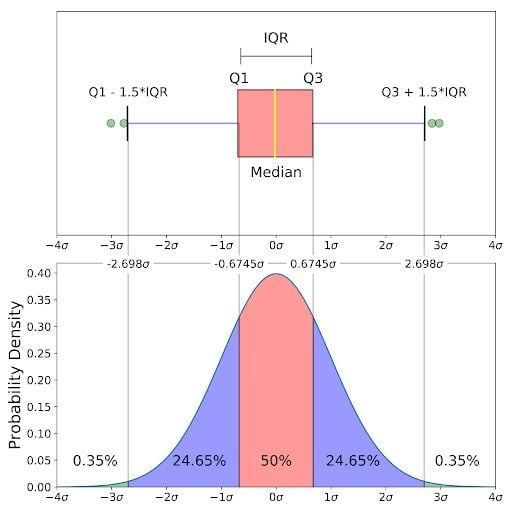

<Axes: ylabel='SalePrice'>

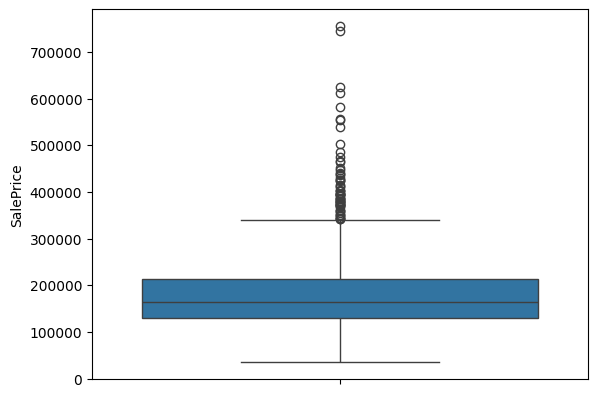

In [164]:
#outliers
sns.boxplot(new_houses_data["SalePrice"])

In [165]:
import numpy as np

# Initialize empty lists to store indices of outliers
up_lst = []
low_lst = []

# Iterate over each column in 'cols'
for i in numerical_best_features:
    # Print the current column name
    print(i)
    
    # Calculate the first quartile (25th percentile) of the column
    Q1 = np.percentile(houses_data[i], 25, interpolation='midpoint')
    
    # Calculate the third quartile (75th percentile) of the column
    Q3 = np.percentile(houses_data[i], 75, interpolation='midpoint')
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Identify outlier indices for values above the upper bound
    # Upper bound is defined as Q3 + 1.5 * IQR
    upper = np.where(houses_data[i] >= (Q3 + 1.5 * IQR))
    print("upper", upper)
    
    # Identify outlier indices for values below the lower bound
    # Lower bound is defined as Q1 - 1.5 * IQR
    lower = np.where(houses_data[i] <= (Q1 - 1.5 * IQR))
    print("lower =", lower)
    
    ''' Removing the Outliers '''
    # Add unique outlier indices above the upper bound to 'up_lst'
    for j in range(len(upper[0])):
        if not (upper[0][j] in up_lst):
            up_lst.append(upper[0][j])
    
    # Add unique outlier indices below the lower bound to 'low_lst'
    for k in range(len(lower[0])):
        if not (lower[0][k] in low_lst):
            low_lst.append(lower[0][k])


SalePrice
upper (array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1388, 1437], dtype=int64),)
lower = (array([], dtype=int64),)
OverallQual
upper (array([  58,  185,  224,  389,  440,  515,  523,  583,  591,  691,  825,
        994, 1169, 1182, 1243, 1298, 1373, 1442], dtype=int64),)
lower = (array([ 375,  533,  636,  916, 1100], dtype=int64),)
GrLivArea
upper (array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
        635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
       1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386], dtype=int64),)
lower = (array([], dtype=int64),)
GarageCars
upper (array([ 420,  

In [166]:
up_lst

[11,
 53,
 58,
 112,
 151,
 161,
 178,
 185,
 224,
 231,
 278,
 309,
 313,
 320,
 321,
 336,
 349,
 378,
 389,
 440,
 473,
 477,
 481,
 496,
 515,
 527,
 585,
 591,
 608,
 642,
 644,
 654,
 661,
 664,
 678,
 688,
 691,
 702,
 718,
 769,
 774,
 798,
 803,
 825,
 877,
 898,
 987,
 990,
 1046,
 1142,
 1169,
 1181,
 1182,
 1228,
 1243,
 1267,
 1268,
 1353,
 1373,
 1388,
 1437,
 523,
 583,
 994,
 1298,
 1442,
 118,
 197,
 304,
 324,
 635,
 961,
 1024,
 1031,
 1173,
 1175,
 1312,
 1328,
 1386,
 420,
 747,
 1190,
 1340,
 1350,
 270,
 317,
 408,
 581,
 1061,
 1087,
 1184,
 1241,
 1417,
 70,
 332,
 888,
 1044,
 1205,
 1223,
 1250,
 66,
 113,
 175,
 529,
 1346,
 144,
 190,
 261,
 316,
 328,
 330,
 403,
 417,
 447,
 488,
 505,
 566,
 570,
 619,
 745,
 778,
 809,
 843,
 848,
 875,
 883,
 897,
 910,
 926,
 939,
 1030,
 1032,
 1043,
 1058,
 1062,
 1068,
 1230,
 1275,
 1284,
 1292,
 1313,
 1387,
 1416,
 1440]

In [167]:
up_arr = np.array(up_lst)
low_arr = np.array(low_lst)
up_arr.shape , low_arr.shape

((144,), (50,))

In [168]:
out_index = np.append(low_arr , up_arr)
out_rows = np.unique(out_index)

In [169]:
out_rows.shape

(189,)

In [170]:
training_data = new_houses_data.drop(out_rows , axis = 0)
training_data

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,0,5,0,5,13,2,0,1,208500,7,1710,2,548,856,856,2,8,2003
1,3,0,24,0,2,8,0,0,1,181500,6,1262,2,460,1262,1262,2,6,1976
2,0,0,5,0,5,13,2,0,1,223500,7,1786,2,608,920,920,2,6,2001
3,0,0,6,0,5,15,0,2,5,140000,7,1717,3,642,756,961,1,7,1915
4,0,0,15,0,5,13,2,0,1,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,8,0,5,13,5,0,1,175000,6,1647,2,460,953,953,2,7,1999
1456,3,0,14,0,2,10,0,4,1,210000,6,2073,2,500,1542,2073,2,7,1978
1457,3,0,6,0,5,5,2,0,1,266500,7,2340,1,252,1152,1188,2,9,1941
1458,3,0,12,0,2,8,2,2,1,142125,5,1078,1,240,1078,1078,1,5,1950


<Axes: ylabel='SalePrice'>

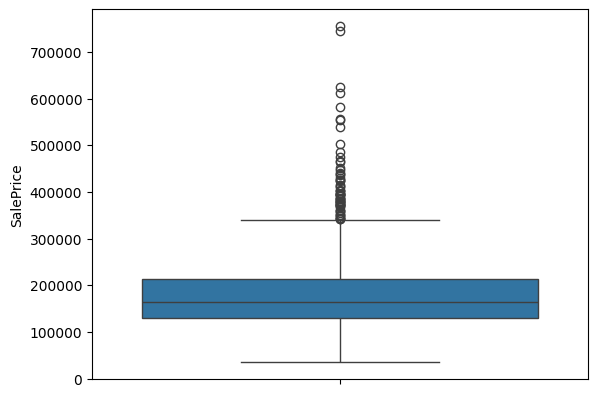

In [171]:
sns.boxplot(new_houses_data["SalePrice"])

<Axes: ylabel='SalePrice'>

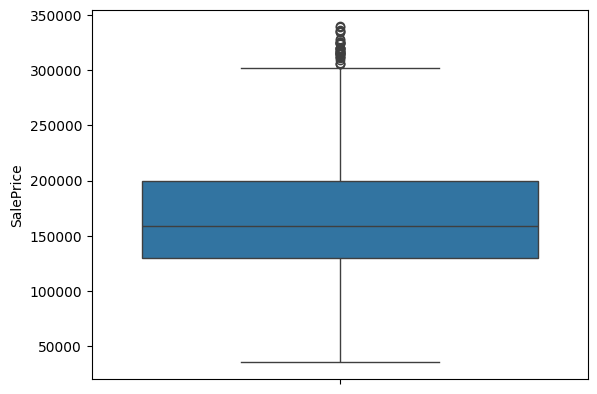

In [172]:
sns.boxplot(training_data["SalePrice"])

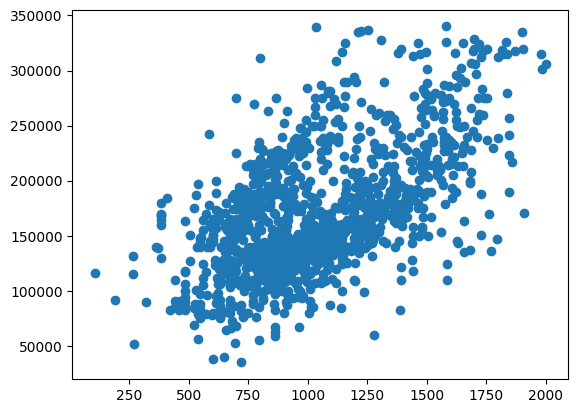

In [175]:
plt.scatter(training_data["TotalBsmtSF"], training_data["SalePrice"])

In [ ]:
# normalization z = (x - Mean)/ std

In [180]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(training_data[numerical_best_features])

In [181]:
df_scaled.shape

(1271, 10)

In [182]:
df_scaled = pd.DataFrame(df_scaled , columns = numerical_best_features)

In [183]:
df_scaled

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,0.699863,0.837450,0.715873,0.434283,0.504135,-0.540870,-0.789480,0.933099,1.373405,1.088611
1,0.219268,0.001316,-0.402682,0.434283,0.040739,0.707467,0.491918,0.933099,-0.176171,0.154758
2,0.966861,0.837450,0.905628,0.434283,0.820087,-0.344088,-0.587487,0.933099,-0.176171,1.019436
3,-0.519426,0.837450,0.733350,1.886844,0.999127,-0.848342,-0.458084,-0.973603,0.598617,-1.955058
4,1.438557,1.673585,1.934298,1.886844,2.020705,0.347724,0.122648,0.933099,2.148193,0.984849
...,...,...,...,...,...,...,...,...,...,...
1266,0.103569,0.001316,0.558576,0.434283,0.040739,-0.242622,-0.483334,0.933099,0.598617,0.950262
1267,0.726563,0.001316,1.622202,0.434283,0.251374,1.568389,3.051559,0.933099,0.598617,0.223932
1268,1.732254,0.837450,2.288840,-1.018278,-1.054561,0.369247,0.258363,0.933099,2.148193,-1.055792
1269,-0.481601,-0.834819,-0.862088,-1.018278,-1.117752,0.141718,-0.088814,-0.973603,-0.950959,-0.744508


In [186]:
df_scaled[significant_cat_features] = training_data[significant_cat_features].values

In [187]:
df_scaled

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType
0,0.699863,0.837450,0.715873,0.434283,0.504135,-0.540870,-0.789480,0.933099,1.373405,1.088611,3,0,5,0,5,13,2,0,1
1,0.219268,0.001316,-0.402682,0.434283,0.040739,0.707467,0.491918,0.933099,-0.176171,0.154758,3,0,24,0,2,8,0,0,1
2,0.966861,0.837450,0.905628,0.434283,0.820087,-0.344088,-0.587487,0.933099,-0.176171,1.019436,0,0,5,0,5,13,2,0,1
3,-0.519426,0.837450,0.733350,1.886844,0.999127,-0.848342,-0.458084,-0.973603,0.598617,-1.955058,0,0,6,0,5,15,0,2,5
4,1.438557,1.673585,1.934298,1.886844,2.020705,0.347724,0.122648,0.933099,2.148193,0.984849,0,0,15,0,5,13,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.103569,0.001316,0.558576,0.434283,0.040739,-0.242622,-0.483334,0.933099,0.598617,0.950262,3,0,8,0,5,13,5,0,1
1267,0.726563,0.001316,1.622202,0.434283,0.251374,1.568389,3.051559,0.933099,0.598617,0.223932,3,0,14,0,2,10,0,4,1
1268,1.732254,0.837450,2.288840,-1.018278,-1.054561,0.369247,0.258363,0.933099,2.148193,-1.055792,3,0,6,0,5,5,2,0,1
1269,-0.481601,-0.834819,-0.862088,-1.018278,-1.117752,0.141718,-0.088814,-0.973603,-0.950959,-0.744508,3,0,12,0,2,8,2,2,1


In [189]:
x = df_scaled.drop(columns=['SalePrice'])
y = df_scaled["SalePrice"]

In [190]:
x_train , x_test , y_train, y_test = train_test_split(x, y , test_size= 0.2)

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
regressor = RandomForestRegressor(n_estimators= 200 , max_depth=5)
regressor.fit(x_train , y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [201]:
y_pred = regressor.predict(x_test)
mean_absolute_error(y_test , y_pred)

0.29609613794392925

In [195]:
y_test.abs().mean()

0.7997271284216472

In [202]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [50 , 100 , 150 , 200],
              "max_depth": [5 , 10 , 15, 20] }
grid_search = GridSearchCV(regressor ,param_grid, cv = 5 , scoring="neg_mean_squared_error" )
grid_search.fit(x_train , y_train)

: 

# Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task1/main/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns = "Id" , inplace = True)

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

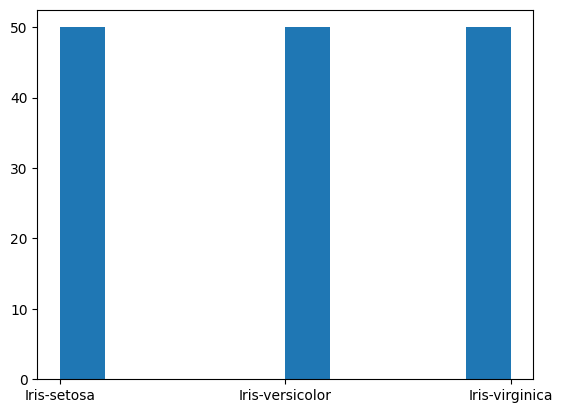

In [10]:
plt.hist(df["Species"]);

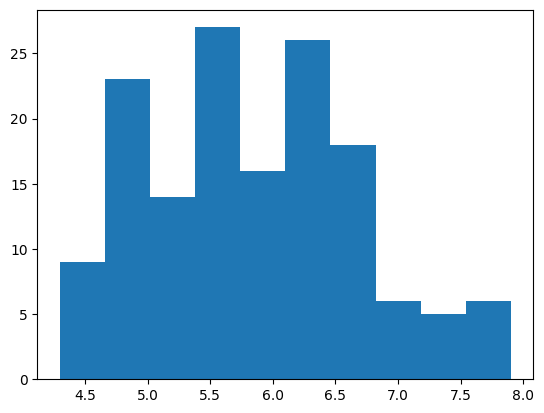

In [11]:
plt.hist(df["SepalLengthCm"]);

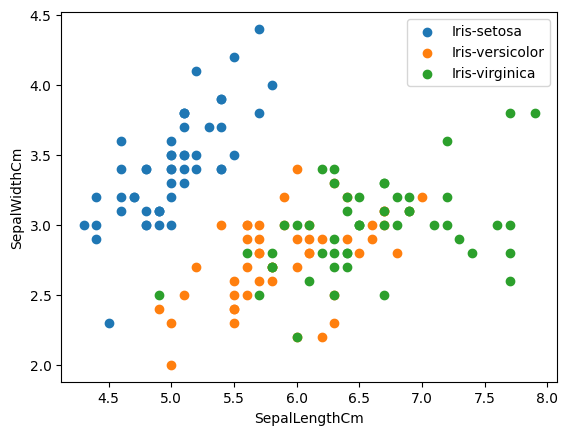

In [15]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["SepalLengthCm"], x["SepalWidthCm"], label = species[i]);
plt.xlabel("SepalLengthCm");
plt.ylabel("SepalWidthCm");
plt.legend()


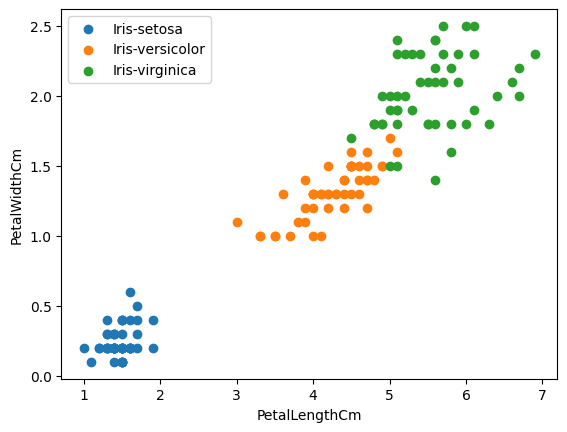

In [16]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], label = species[i]);
plt.xlabel("PetalLengthCm");
plt.ylabel("PetalWidthCm");
plt.legend()


In [17]:
label_encoder = LabelEncoder()
df["species_encoded"] = label_encoder.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [18]:
ecoded_data = df.drop(columns = ["Species"])

In [19]:
ecoded_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
x = ecoded_data.drop(columns = ["species_encoded"])
y = ecoded_data["species_encoded"]

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= 0.2)

In [ ]:
#!pip install tabulate

In [22]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score


Confusion Matrix:


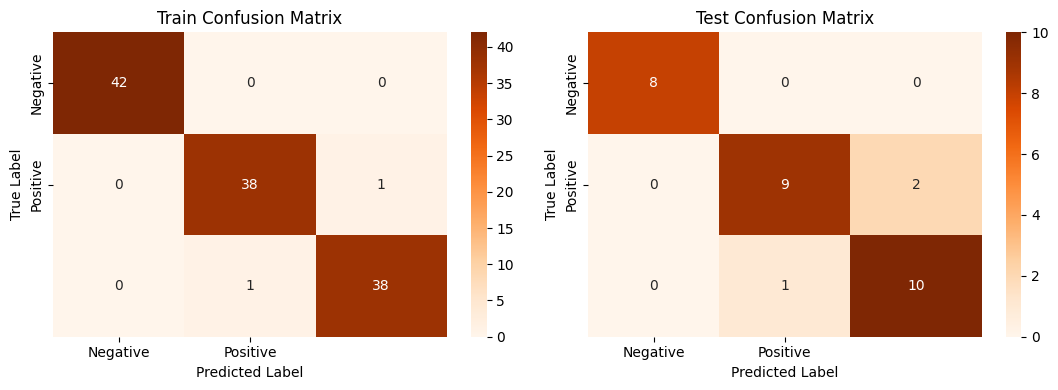


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  42        |
| 1            |    0.974359 | 0.974359 |   0.974359 |  39        |
| 2            |    0.974359 | 0.974359 |   0.974359 |  39        |
| accuracy     |    0.983333 | 0.983333 |   0.983333 |   0.983333 |
| macro avg    |    0.982906 | 0.982906 |   0.982906 | 120        |
| weighted avg |    0.983333 | 0.983333 |   0.983333 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |       8   |
| 1            |    0.9      | 0.818182 |   0.857143 |      11   |
| 2            |    0.833333 | 0.909091 |   0.869565 |      11   |
| accuracy     |    0.9      | 0.9      |   0.9      |       0

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(fit_intercept= True , max_iter=10000)
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)


Confusion Matrix:


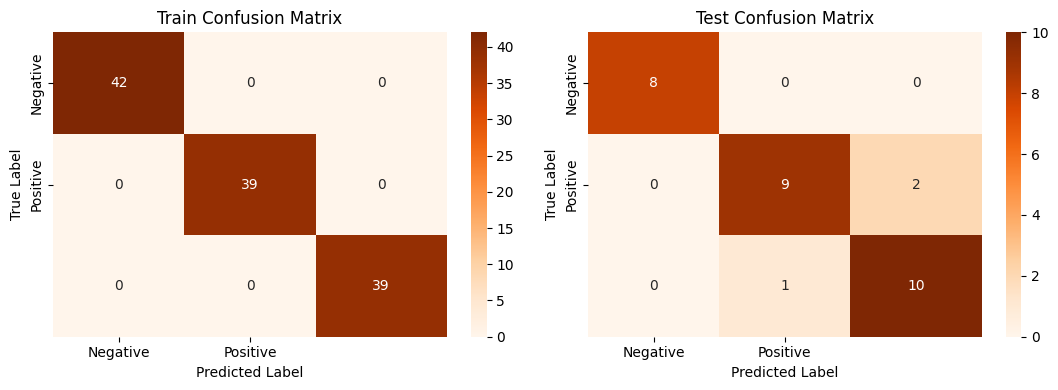


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        42 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        39 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |       8   |
| 1            |    0.9      | 0.818182 |   0.857143 |      11   |
| 2            |    0.833333 | 0.909091 |   0.869565 |      11   |
| accuracy     |    0.9      | 0.9      |   0.9      |       0.9 |
| m

In [33]:
rand_forest = RandomForestClassifier(n_estimators= 15 , max_depth= 10, random_state=0)
rand_score = evaluate_model(rand_forest, x_train, x_test, y_train, y_test)